#### ABCars Inc - design team

In [2]:
import pandas as pd

In [3]:
cars93 = pd.read_csv('Cars93.csv')

In [4]:
cars93.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
cars93.drop('Unnamed: 0',axis=1).columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

manfuctarer, model make: analysis done indepndently
min price, price, max price: analysis done indepndently
MPG.Highway, MPG.city: analysis done indepndently
min price, price, max price: analysis done indepndently
Number of passengers, rear seat room, luggage room, origin, transmission availability : analysis done indepndently

In [6]:
cars93reduced = cars93[['Type','MPG.city','AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile','Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width',
       'Turn.circle','Weight']]

In [7]:
cars93reduced.head()

,Type,MPG.city,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Weight
0,Small,25,None,Front,4,1.8,140,6300,2890,13.2,177,102,68,37,2705
1,Midsize,18,Driver & Passenger,Front,6,3.2,200,5500,2335,18.0,195,115,71,38,3560
2,Compact,20,Driver only,Front,6,2.8,172,5500,2280,16.9,180,102,67,37,3375
3,Midsize,19,Driver & Passenger,Front,6,2.8,172,5500,2535,21.1,193,106,70,37,3405
4,Midsize,22,Driver only,Rear,4,3.5,208,5700,2545,21.1,186,109,69,39,3640


outcome variable: y, predictor variable: x

y = f(x) = ax + b -> linear relationship

dependent variable - outcome 

variable on which it depends - predictor

In bivariate analysis - 1 predictor and 1 outcome vaiable

if the varaibles are numerical in nature then use scatter plot

In multivariate analysis - ?

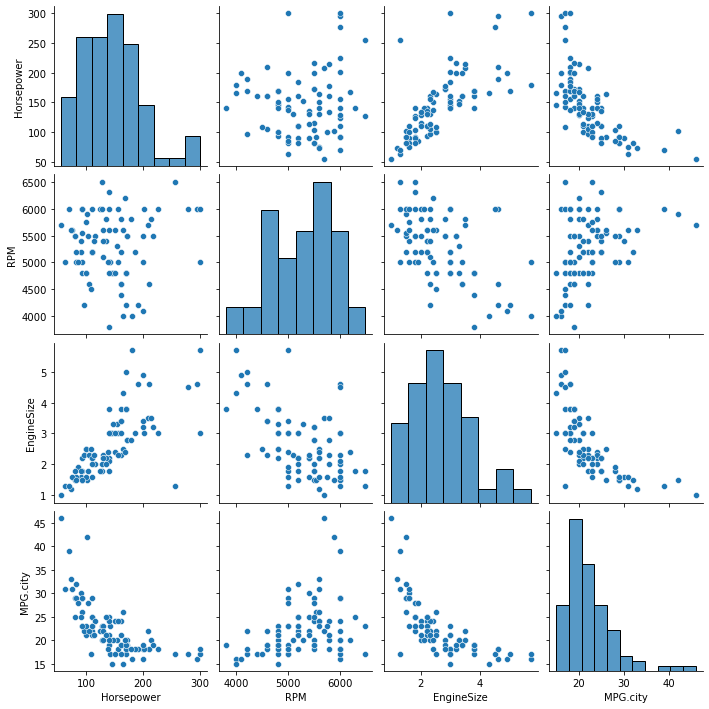

In [8]:
import seaborn as sns
sns.pairplot(cars93reduced, vars=["Horsepower","RPM","EngineSize","MPG.city"])

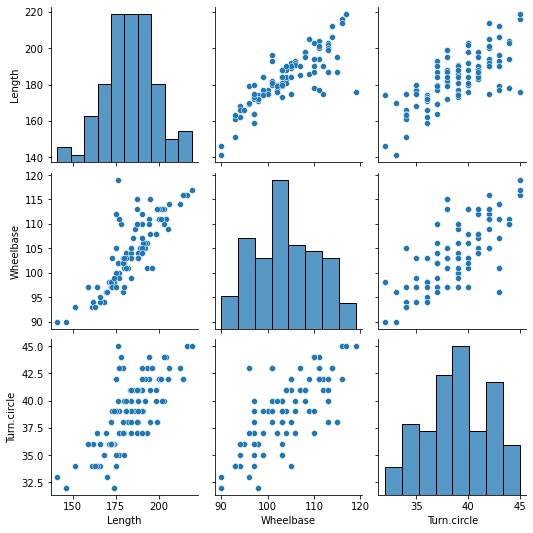

In [9]:
sns.pairplot(cars93reduced, vars=["Length","Wheelbase","Turn.circle"])

scatter plot to see the relation, or how the data looks like

covariance = x.cov(y)

In [10]:
cars93['EngineSize'].cov(cars93['MPG.city']) # Inversely proportional

-4.139165497896213

In [11]:
cars93['Horsepower'].cov(cars93['MPG.city']) # Inversely proportional

-197.9798971482001

In [12]:
cars93['RPM'].cov(cars93['MPG.city']) # Directly proportional

1217.4789621318369

Create a covariance matrix to represent this properly

In [13]:
cars93[['MPG.city','EngineSize','Horsepower','RPM']].cov()

,MPG.city,EngineSize,Horsepower,RPM
MPG.city,31.582281,-4.139165,-197.979897,1217.478962
EngineSize,-4.139165,1.076122,39.776999,-339.163745
Horsepower,-197.979897,39.776999,2743.078775,1146.633941
RPM,1217.478962,-339.163745,1146.633941,356088.709677


Correlation is the normalised covariance [-1,1]

correlation -. r  Population -> p

Positive association -> r or p > 0 

Negative association -> r or p < 0 

No Linear association -> r or p = 0 

Monotonic - If relationship between x and y is entirely increasing or decreasing as x increases

Non - Monotonic - If relationship between x and y is NOT entirely increasing or decreasing as x increases

Pearson - Normal distribution; monotonic or non-monotonic
Spearman / Kendal - Anyone of them can be used - monotonic 

In [14]:
# To test if data is normally distributed or not
# if pvalue > 0.05 (significant value) - then values are normally distributed
from scipy.stats import shapiro
shapiro(cars93["Turn.circle"])

ShapiroResult(statistic=0.9762530326843262, pvalue=0.08784385770559311)

In [15]:
shapiro(cars93["Length"])

ShapiroResult(statistic=0.9909828305244446, pvalue=0.7838887572288513)

In [16]:
shapiro(cars93["Wheelbase"])

ShapiroResult(statistic=0.9785544276237488, pvalue=0.12946628034114838)

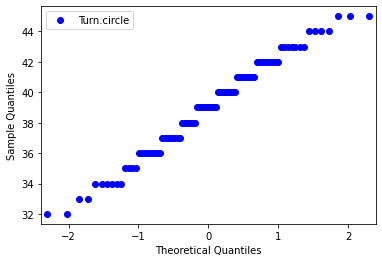

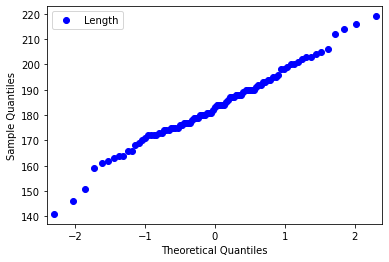

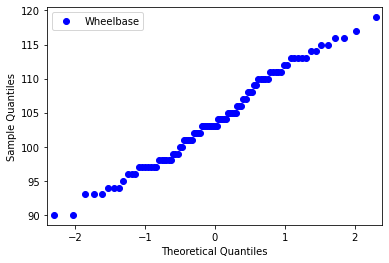

In [17]:
# Another way to see if data is normally distributed or not (i.e. close to a straight line)
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(cars93["Turn.circle"])
plt.legend(["Turn.circle"])
plt.show()
sm.qqplot(cars93["Length"])
plt.legend(["Length"])
plt.show()
sm.qqplot(cars93["Wheelbase"])
plt.legend(["Wheelbase"])
plt.show()

In [18]:
cars93["Length"].cov(cars93["Turn.circle"])

34.780621785881266

In [19]:
cars93["Length"].corr(cars93["Turn.circle"],method="pearson")

0.7389545018604418

In [20]:
cars93["Wheelbase"].cov(cars93["Turn.circle"])

15.899836372136514

In [21]:
cars93["Wheelbase"].corr(cars93["Turn.circle"],method="pearson")

0.7233244020299519

The correlation is strong, corr value is closer to 1
If the corr is closer to 0, then the variables might be statistically independent 

In [22]:
# Spearman
shapiro(cars93["Horsepower"])

ShapiroResult(statistic=0.9358058571815491, pvalue=0.00019156414782628417)

In [23]:
shapiro(cars93["RPM"])

ShapiroResult(statistic=0.9739203453063965, pvalue=0.059240180999040604)

In [24]:
shapiro(cars93["EngineSize"])

ShapiroResult(statistic=0.9360973238945007, pvalue=0.00019901638734154403)

In [25]:
shapiro(cars93["MPG.city"])

ShapiroResult(statistic=0.8583050966262817, pvalue=5.762488086702433e-08)

In [26]:
first10hp = cars93["Horsepower"].head(10)
first10hp = first10hp.sort_values(ascending=False)
rankfirst10hp = first10hp.rank()
print(list(rankfirst10hp)) 

[10.0, 8.5, 8.5, 7.0, 5.5, 5.5, 3.5, 3.5, 2.0, 1.0]


In [27]:
first10hp.head()

4    208
9    200
1    200
7    180
3    172
Name: Horsepower, dtype: int64

In [28]:
cars93["Horsepower"].corr(cars93["MPG.city"],method="spearman")

-0.7893070882303793

In [29]:
cars93["RPM"].corr(cars93["MPG.city"],method="spearman")

0.38964509885135185

In [30]:
cars93["EngineSize"].corr(cars93["MPG.city"],method="spearman")

-0.8212079921743175

The correlation values suggest that the association between EngineSize and MPG.city is stronger than the association between Horsepower and MPG.city. Here it can be noticed that the strength of the association is attributed to the magnitude of the correlation value and not the sign.

In [31]:
two_way_table = pd.crosstab(index=cars93["DriveTrain"], 
                           columns=cars93["Type"])
two_way_table.index = ["4WD","Front","Rear"]
two_way_table

Type,Compact,Large,Midsize,Small,Sporty,Van
4WD,1,0,0,2,2,5
Front,13,7,17,19,7,4
Rear,2,4,5,0,5,0


Chi-Squared Test - To examine the relationship between two categorical variables

1.Define Null and Alternate Hypothesis

H(0) - Null - The variables are independent
H(1) - Alternate - The variables are dependent

2.Significance Level - 0.05
3.Identify degrees of freedom = (number of rows - 1) * (number of clums - 1)

In [32]:
from scipy.stats import chi2, chi2_contingency

In [33]:
chi2.ppf(1-0.05,10)
chi2_contingency(two_way_table)

(35.00129365348582,
 0.00012480179759447616,
 10,
 array([[ 1.72043011,  1.1827957 ,  2.3655914 ,  2.25806452,  1.50537634,
          0.96774194],
        [11.52688172,  7.92473118, 15.84946237, 15.12903226, 10.08602151,
          6.48387097],
        [ 2.75268817,  1.89247312,  3.78494624,  3.61290323,  2.40860215,
          1.5483871 ]]))

In [34]:
#phi coffecient - association between 2 binary variables; lies between [1-1] , closer to 1 implies strong correlation
cars93[["Man.trans.avail","Origin"]].head(10)

,Man.trans.avail,Origin
0,Yes,non-USA
1,Yes,non-USA
2,Yes,non-USA
3,Yes,non-USA
4,Yes,non-USA
5,No,USA
6,No,USA
7,No,USA
8,No,USA
9,No,USA


In [35]:
origin_trans = pd.crosstab(index=cars93["Man.trans.avail"], 
                           columns=cars93["Origin"])
origin_trans.index = ["No","Yes"]
origin_trans["Sum"] = origin_trans.sum(axis=1)
origin_trans

Origin,USA,non-USA,Sum
No,26,6,32
Yes,22,39,61


In [36]:
other = origin_trans.sum(axis=0)
other = pd.DataFrame({"Sum":list(other)})
other.index=["USA","non-USA","Sum"]
transposed_other = other.T
origin_trans.append(transposed_other,sort=False)
#other

Origin,USA,non-USA,Sum
No,26,6,32
Yes,22,39,61
Sum,48,45,93


In [37]:
man_vec = cars93["Man.trans.avail"].apply(lambda x: 1 if x=="Yes" else 0)
#man_vec
origin_vec = cars93["Origin"].apply(lambda x: 1 if x=="USA" else 0)

In [38]:
man_vec.corr(origin_vec, method="pearson")

-0.4295382099074451

phi^2 = chi^2/n

### Market Basket Analysis

ABCarz have various showrooms across the city where they sell their cars and various other automobile accessories to customers. The marketing managers of ABCarz are looking to market their products better by analyzing customer buying patterns. Data about the various accessories that are purchased is collected for this analysis

In [39]:
df = pd.read_excel("marketbasket-caraccessories.xlsx")

In [40]:
df.head()

,Seat Cover,Audio system,Car cover,Steering Cover,Toolbox,Foot mats,Mud flaps,Window tint
0,y,NaN,y,NaN,NaN,y,y,NaN
1,y,y,NaN,y,NaN,y,NaN,NaN
2,NaN,NaN,y,NaN,NaN,NaN,NaN,y
3,NaN,y,NaN,NaN,NaN,NaN,y,y
4,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN


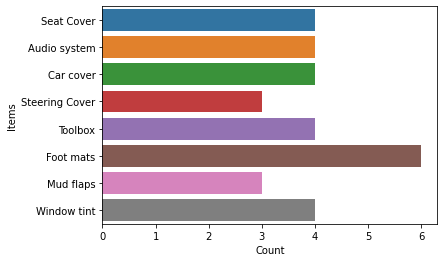

In [41]:
df = df.replace(float("nan"), 0)
df = df.replace("y", 1)
df = pd.DataFrame({"Items":list(df.columns),
                   "Count":list(df.sum(axis=0))
                  })
bar = sns.barplot(data = df,y="Items",x="Count") #plot the items x count

Support = # of transactions containing both x and y / total number of transactions

Confidence = # of transactions containing both x and y / total number of transactions containing x

Lift -> confidence (x/y) / support (y)
support(y) -> total number of transactions containing y/ total number of transactions

lift = 1 , then x an y are disassociated or indpendent

lift > 1, then x and y are positively associated (ie presence of x indicates presence of y)

lift < 1, then x and y are negatively associated

#### Apriori technique

When the data set has a large number of transactions with a considerably large number of items, discovering interesting associations among items will be time-consuming. The technique illustrated earlier may not facilitate the purpose of determining interesting associations in an efficient manner. In order to analyze interesting associations among a larger number of items for a substantially higher number of transactions, sophisticated techniques are adopted. One such technique is the Apriori technique.

In [42]:
from mlxtend.frequent_patterns import apriori 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [43]:
file = open("Groceries.csv",'r')
strings = []
for i in file.readlines():
    strings.append(i.strip().split("\n")) #get strings as a list of strings
#print(strings)
dataset = []
for i in strings:
    dataset.append(i[0].split(",")) # split strings to the list of strings. 
#print(dataset)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#df.head()
frequent_itemsets = apriori(df, min_support=0.07, use_colnames=True)
print(frequent_itemsets)

     support                        itemsets
0   0.080529                  (bottled beer)
1   0.110524                 (bottled water)
2   0.077682                   (canned beer)
3   0.082766                  (citrus fruit)
4   0.072293         (fruit/vegetable juice)
5   0.079817                    (newspapers)
6   0.193493              (other vegetables)
7   0.088968                        (pastry)
8   0.075648                     (pip fruit)
9   0.183935                    (rolls/buns)
10  0.108998               (root vegetables)
11  0.093950                       (sausage)
12  0.098526                 (shopping bags)
13  0.174377                          (soda)
14  0.104931                (tropical fruit)
15  0.071683            (whipped/sour cream)
16  0.255516                    (whole milk)
17  0.139502                        (yogurt)
18  0.074835  (whole milk, other vegetables)


In [44]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).head() #confidence metric

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013


In [45]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1).head() #lift metric with higher threshold

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
